In [29]:
import sklearn, pandas as pd, numpy as np, seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.neighbors import KernelDensity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import math
from math import ceil
from scipy import stats
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

In [30]:
data_reduce_pca = np.loadtxt(fname='dim_reduce_pca.csv', delimiter=',')
data_reduce_ica = np.loadtxt(fname='dim_reduce_ica.csv', delimiter = ',')
#data_reduce_tsne = np.loadtxt(fname='dim_reduce_tsne.csv', delimiter=',')
data_reduce_kpca_poly = np.loadtxt(fname='dim_reduce_kpca_poly.csv', delimiter=',')
data_reduce_kpca_rbf = np.loadtxt(fname='dim_reduce_kpca_rbf.csv', delimiter = ',')
data_reduce_kpca_sig = np.loadtxt(fname='dim_reduce_kpca_sig.csv', delimiter=',')
data_reduce_kpca_cos = np.loadtxt(fname='dim_reduce_kpca_cos.csv', delimiter=',')

In [31]:
def num_bins_Scotts(data):
    num_bins = []
    for i in range(data.shape[1]):
        s = np.std(data[:,i])
        bin_width = 3.49 * s * (data.shape[0]**(-1/3))
        num_bins.append(ceil((np.max(data[:,i])-np.min(data[:,i]))/bin_width))
    return num_bins

In [32]:
def num_bins_Freedman_Diaconis(data):
    num_bins = []
    for i in range(data.shape[1]):
        iqr = stats.iqr(data[:,i])
        h = 2 * iqr * (len(data[:,i]) ** (-1/3))
        num_bins.append(ceil((np.max(data[:,i])-np.min(data[:,i]))/h))
    return num_bins

In [33]:
#histogram
def histogram(data, bins, frequency = False):
    all_hist = []
    all_bins = []
    for i in range(data.shape[1]):
        hist, bin_edges = np.histogram(data[:,i], bins = bins[i], density = not frequency)
        all_hist.append(hist)
        all_bins.append(bin_edges)
    return all_hist, all_bins

In [34]:
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

In [35]:
def find_bin(bins, value):
    if value == bins[0]:
        return 0
    i = 1
    while value > bins[i]:
        i+=1
    return i-1

In [36]:
# Scott's method
# hists_pca, bins_pca = histogram(data_reduce_pca, num_bins_Scotts(data_reduce_pca))
# hists_ica, bins_ica = histogram(data_reduce_ica, num_bins_Scotts(data_reduce_ica))
# #hists_tsne, bins_tsne = histogram(data_reduce_tsne, num_bins_Scotts(data_reduce_tsne))
# hists_kpca_poly, bins_kpca_poly = histogram(data_reduce_kpca_poly, num_bins_Scotts(data_reduce_kpca_poly))
# hists_kpca_rbf, bins_kpca_rbf = histogram(data_reduce_kpca_rbf, num_bins_Scotts(data_reduce_kpca_rbf))
# hists_kpca_sig, bins_kpca_sig = histogram(data_reduce_kpca_sig, num_bins_Scotts(data_reduce_kpca_sig))
# hists_kpca_cos, bins_kpca_cos = histogram(data_reduce_kpca_cos, num_bins_Scotts(data_reduce_kpca_cos))


#Freedman-Diaconis method
hists_pca, bins_pca = histogram(data_reduce_pca, num_bins_Freedman_Diaconis(data_reduce_pca))
hists_ica, bins_ica = histogram(data_reduce_ica, num_bins_Freedman_Diaconis(data_reduce_ica))
#hists_tsne, bins_tsne = histogram(data_reduce_tsne, num_bins_Freedman_Diaconis(data_reduce_tsne))
hists_kpca_poly, bins_kpca_poly = histogram(data_reduce_kpca_poly, num_bins_Freedman_Diaconis(data_reduce_kpca_poly))
hists_kpca_rbf, bins_kpca_rbf = histogram(data_reduce_kpca_rbf, num_bins_Freedman_Diaconis(data_reduce_kpca_rbf))
hists_kpca_sig, bins_kpca_sig = histogram(data_reduce_kpca_sig, num_bins_Freedman_Diaconis(data_reduce_kpca_sig))
hists_kpca_cos, bins_kpca_cos = histogram(data_reduce_kpca_cos, num_bins_Freedman_Diaconis(data_reduce_kpca_cos))


#Square root method
# hists_pca, bins_pca = histogram(data_reduce_pca, (math.ceil(math.sqrt(data_reduce_pca.shape[0]))) * np.ones(data_reduce_pca.shape[1], dtype = int))
# hists_ica, bins_ica = histogram(data_reduce_ica, (math.ceil(math.sqrt(data_reduce_ica.shape[0]))) * np.ones(data_reduce_pca.shape[1], dtype = int))
# #hists_tsne, bins_tsne = histogram(data_reduce_tsne, (math.ceil(math.sqrt(data_reduce_tsne.shape[0]))) * np.ones(data_reduce_tsne.shape[1], dtype = int))
# hists_kpca_poly, bins_kpca_poly = histogram(data_reduce_kpca_poly, (math.ceil(math.sqrt(data_reduce_kpca_poly.shape[0]))) * np.ones(data_reduce_kpca_poly.shape[1], dtype = int))
# hists_kpca_rbf, bins_kpca_rbf = histogram(data_reduce_kpca_rbf, (math.ceil(math.sqrt(data_reduce_kpca_rbf.shape[0]))) * np.ones(data_reduce_kpca_rbf.shape[1], dtype = int))
# hists_kpca_sig, bins_kpca_sig = histogram(data_reduce_kpca_sig, (math.ceil(math.sqrt(data_reduce_kpca_sig.shape[0]))) * np.ones(data_reduce_kpca_sig.shape[1], dtype = int))
# hists_kpca_cos, bins_kpca_cos = histogram(data_reduce_kpca_cos, (math.ceil(math.sqrt(data_reduce_kpca_cos.shape[0]))) * np.ones(data_reduce_kpca_cos.shape[1], dtype = int))

Text(0.5, 1.0, 'Histogram of first feature')

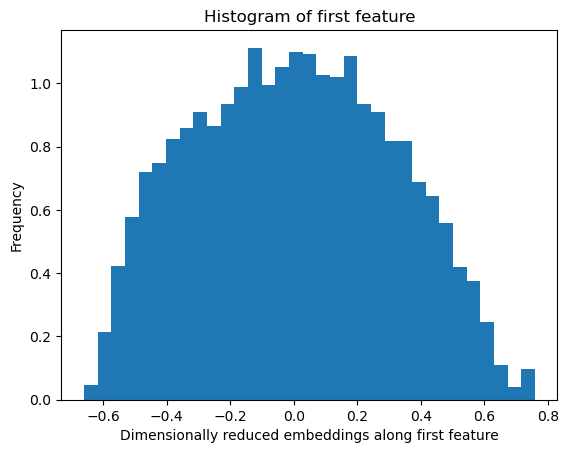

In [37]:
h= plt.hist(data_reduce_kpca_cos[:,0], num_bins_Freedman_Diaconis(data_reduce_kpca_cos)[0], density = True)
plt.xlabel("Dimensionally reduced embeddings along first feature")
plt.ylabel("Frequency")
plt.title("Histogram of first feature")

In [38]:
def probability(histograms, bins, data):
    probs = []
    for col in range(data.shape[1]):
        col_prob = []
        width = np.diff(np.array(bins[col]))[0]
        for row in range(data.shape[0]):
            idx = find_bin(bins[col], data[row][col])
            prob = histograms[col][idx] * width
            col_prob.append(prob)
        probs.append(col_prob)
    return np.array(probs).T

In [39]:
#print(hists_pca.shape[1])
probs_pca = probability(hists_pca, bins_pca, data_reduce_pca)
probs_ica = probability(hists_ica, bins_ica, data_reduce_ica)
#probs_tsne = probability(hists_tsne, bins_tsne, data_reduce_tsne)
probs_kpca_poly = probability(hists_kpca_poly, bins_kpca_poly, data_reduce_kpca_poly)
probs_kpca_rbf = probability(hists_kpca_rbf, bins_kpca_rbf, data_reduce_kpca_rbf)
probs_kpca_sig = probability(hists_kpca_sig, bins_kpca_sig, data_reduce_kpca_sig)
probs_kpca_cos = probability(hists_kpca_cos, bins_kpca_cos, data_reduce_kpca_cos)
print(probs_pca.shape)
print(probs_ica.shape)
#print(probs_tsne.shape)
print(probs_kpca_poly.shape)
print(probs_kpca_rbf.shape)
print(probs_kpca_sig.shape)
print(probs_kpca_cos.shape)

(10929, 75)
(10929, 75)
(10929, 75)
(10929, 75)
(10929, 75)
(10929, 75)


In [40]:
def sentence_surprisals(probs):
    surprisals = []
    for i in range(probs.shape[0]):
        surprisals.append(-1*sum(np.log2(probs[i])))
    return np.array(surprisals)

### Testing weighing the PCA probabilities by explained variance ratio

In [41]:
pca_exp_var_ratio = np.loadtxt(fname='PCA_Explained_Variance_Ratio.csv', delimiter=',')
def sentence_surprisals_pca(probs):
    surprisals = []
    for i in range(probs.shape[0]):
        curr_sen_surprisal = 0
        for j in range(probs.shape[1]):
            curr_sen_surprisal += np.log2(pca_exp_var_ratio[j]*probs[i][j])
        surprisals.append(-1*curr_sen_surprisal)
    return np.array(surprisals)

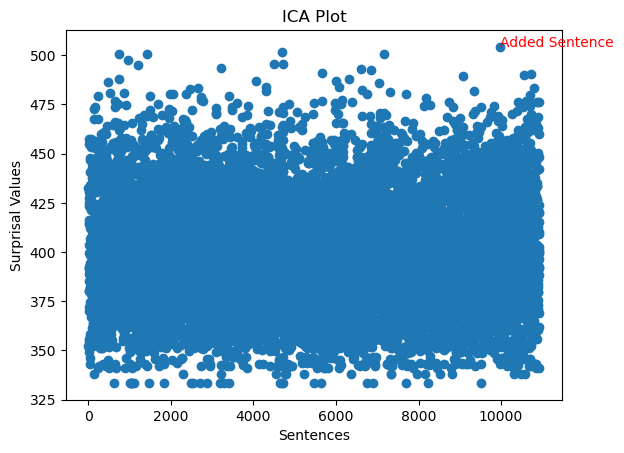

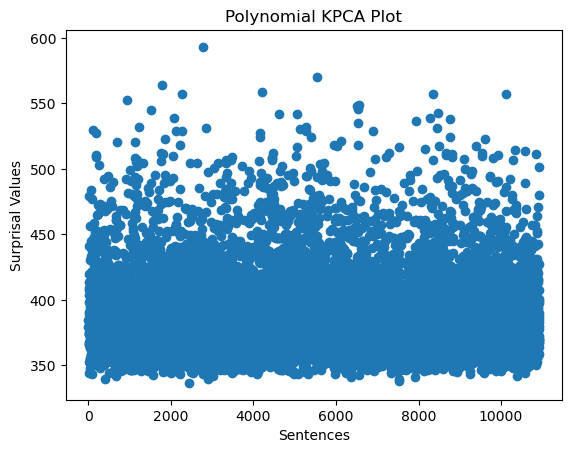

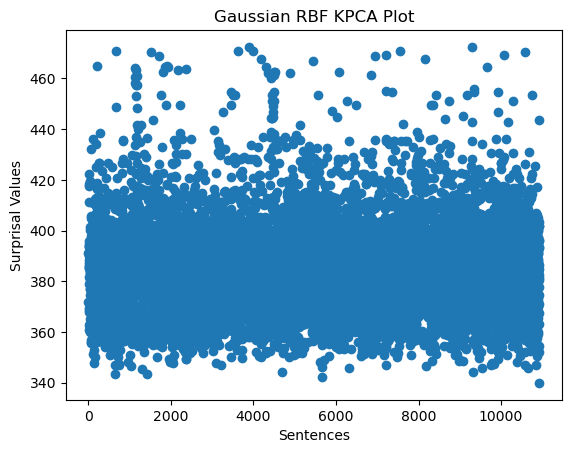

In [42]:
sen_surprisals_pca = sentence_surprisals(probs_pca)
#sen_surprisals_pca = sentence_surprisals_pca(probs_pca) #testing for explained variance weighted probabililites
sen_surprisals_ica = sentence_surprisals(probs_ica)
#sen_surprisals_tsne = sentence_surprisals(probs_tsne)
sen_surprisals_kpca_poly = sentence_surprisals(probs_kpca_poly)
sen_surprisals_kpca_rbf = sentence_surprisals(probs_kpca_rbf)
sen_surprisals_kpca_sig = sentence_surprisals(probs_kpca_sig)
sen_surprisals_kpca_cos = sentence_surprisals(probs_kpca_cos)
#print("PCA: ", sen_surprisals_pca, "\n")
#print("ICA: ", sen_surprisals_ica)
#print("TSNE: ", sen_surprisals_tsne)

plt.scatter(np.arange(data_reduce_ica.shape[0]), sen_surprisals_ica)
plt.text(np.argmax(sen_surprisals_ica), np.max(sen_surprisals_ica), "Added Sentence", color = 'red', size = 10)
plt.title("ICA Plot")
plt.xlabel("Sentences")
plt.ylabel("Surprisal Values")
plt.show()

plt.figure()
plt.scatter(np.arange(data_reduce_kpca_poly.shape[0]), sen_surprisals_kpca_poly)
plt.title("Polynomial KPCA Plot")
plt.xlabel("Sentences")
plt.ylabel("Surprisal Values")
plt.show()
#print(np.max(sen_surprisals_kpca_poly), sen_surprisals_kpca_poly[-1])


plt.figure()
plt.scatter(np.arange(data_reduce_kpca_rbf.shape[0]), sen_surprisals_kpca_rbf)
plt.title("Gaussian RBF KPCA Plot")
plt.xlabel("Sentences")
plt.ylabel("Surprisal Values")
plt.show()


In [43]:
def entropy(probs):
    entropies = []
    for i in range(probs.shape[0]): #sentences
        this_sen_entropy = 0
        for j in range(probs.shape[1]): #features
            this_sen_entropy += probs[i][j] * np.log2(probs[i][j])
        entropies.append(this_sen_entropy)
    entropies = np.array(entropies)
    entropies *= -1
    return entropies

In [44]:
entropies_pca = entropy(probs_pca)
entropies_ica = entropy(probs_ica)
#entropies_tsne = entropy(probs_tsne)
entropies_kpca_poly = entropy(probs_kpca_poly)
entropies_kpca_rbf = entropy(probs_kpca_rbf)
entropies_kpca_sig = entropy(probs_kpca_sig)
entropies_kpca_cos = entropy(probs_kpca_cos)
print("PCA: ", entropies_pca)
print("ICA: ", entropies_ica)
#print("t-SNE: ", entropies_tsne)
print("Polynomial KPCA: ", entropies_kpca_poly)
print("Gaussian RBF KPCA: ", entropies_kpca_rbf)
print("Sigmoid KPCA: ", entropies_kpca_sig)
print("Cosine KPCA: ", entropies_kpca_cos)

PCA:  [13.67545749 11.15649368 12.92010229 ... 12.74940566 10.33278686
  9.90880874]
ICA:  [14.18811142  9.90377943 12.45161565 ... 10.95312695  9.27665954
  8.57567564]
Polynomial KPCA:  [11.91589146 12.17201435 12.49029222 ... 13.36061002 11.44631538
 10.28235895]
Gaussian RBF KPCA:  [11.5611757  12.72129914 11.82410341 ... 12.07194035 13.14479043
 14.75312813]
Sigmoid KPCA:  [14.17344175 11.10890584 12.40691061 ... 11.93979836 10.09989071
  9.34393883]
Cosine KPCA:  [13.86617598 11.77734584 12.31953467 ... 10.99583047 11.15419337
 12.44170341]


In [45]:
df_sen_surprisal_pca = pd.DataFrame(sen_surprisals_pca)
df_entropies_pca = pd.DataFrame(entropies_pca)

df_sen_surprisals_ica = pd.DataFrame(sen_surprisals_ica)
df_entropies_ica = pd.DataFrame(entropies_ica)

#df_sen_surprisal_tsne = pd.DataFrame(sen_surprisals_tsne)
#df_entropies_tsne = pd.DataFrame(entropies_tsne)

df_sen_surprisal_kpca_poly = pd.DataFrame(sen_surprisals_kpca_poly)
df_entropies_kpca_poly = pd.DataFrame(entropies_kpca_poly)

df_sen_surprisal_kpca_rbf = pd.DataFrame(sen_surprisals_kpca_rbf)
df_entropies_kpca_rbf = pd.DataFrame(entropies_kpca_rbf)

df_sen_surprisal_kpca_sig = pd.DataFrame(sen_surprisals_kpca_sig)
df_entropies_kpca_sig = pd.DataFrame(entropies_kpca_sig)

df_sen_surprisal_kpca_cos = pd.DataFrame(sen_surprisals_kpca_cos)
df_entropies_kpca_cos = pd.DataFrame(entropies_kpca_cos)


df_sen_surprisal_pca.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_pca.csv", index = False, header = False)
df_entropies_pca.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_pca.csv", index = False, header = False)

df_sen_surprisals_ica.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_ica.csv", index = False, header = False)
df_entropies_ica.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_ica.csv", index = False, header = False)

#df_sen_surprisal_tsne.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_tsne.csv", index = False, header = False)
#df_entropies_tsne.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_tsne.csv", index = False, header = False)

df_sen_surprisal_kpca_poly.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_kpca_poly.csv", index = False, header = False)
df_entropies_kpca_poly.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_kpca_poly.csv", index = False, header = False)

df_sen_surprisal_kpca_rbf.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_kpca_rbf.csv", index = False, header = False)
df_entropies_kpca_rbf.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_kpca_rbf.csv", index = False, header = False)

df_sen_surprisal_kpca_sig.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_kpca_sig.csv", index = False, header = False)
df_entropies_kpca_sig.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_kpca_sig.csv", index = False, header = False)

df_sen_surprisal_kpca_cos.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\sentence_surprisals_kpca_cos.csv", index = False, header = False)
df_entropies_kpca_cos.to_csv(r"C:\Users\vaj1\Documents\sentencesurprisal\entropies_kpca_cos.csv", index = False, header = False)